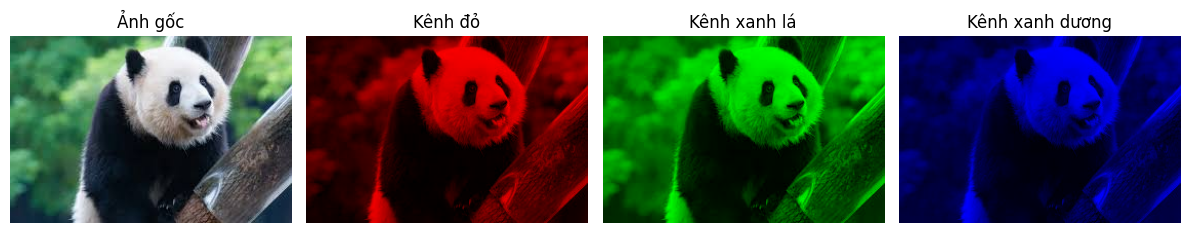

In [ ]:
#bài 1
import imageio.v2 as iio
import numpy as np
import matplotlib.pylab as plt

# Đọc ảnh gốc
img = iio.imread('gau.jpg')

# Tách kênh màu
r = img.copy()
r[:, :, 1:] = 0  # Giữ kênh đỏ

g = img.copy()
g[:, :, [0, 2]] = 0  # Giữ kênh xanh lá

b = img.copy()
b[:, :, :2] = 0  # Giữ kênh xanh dương

# Ghi ra file nếu muốn
iio.imwrite('red_image.jpg', r)
iio.imwrite('green_image.jpg', g)
iio.imwrite('blue_image.jpg', b)

# Hiển thị ảnh
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(r)
plt.title('Ảnh  đỏ')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(g)
plt.title('Ảnh xanh lá')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(b)
plt.title('Ảnh xanh dương')
plt.axis('off')

plt.tight_layout()
plt.show()


Đã lưu: color_swapped\BGR.jpg
Đã lưu: color_swapped\GRB.jpg
Đã lưu: color_swapped\BRG.jpg
Đã lưu: color_swapped\GBR.jpg
Đã lưu: color_swapped\RBG.jpg


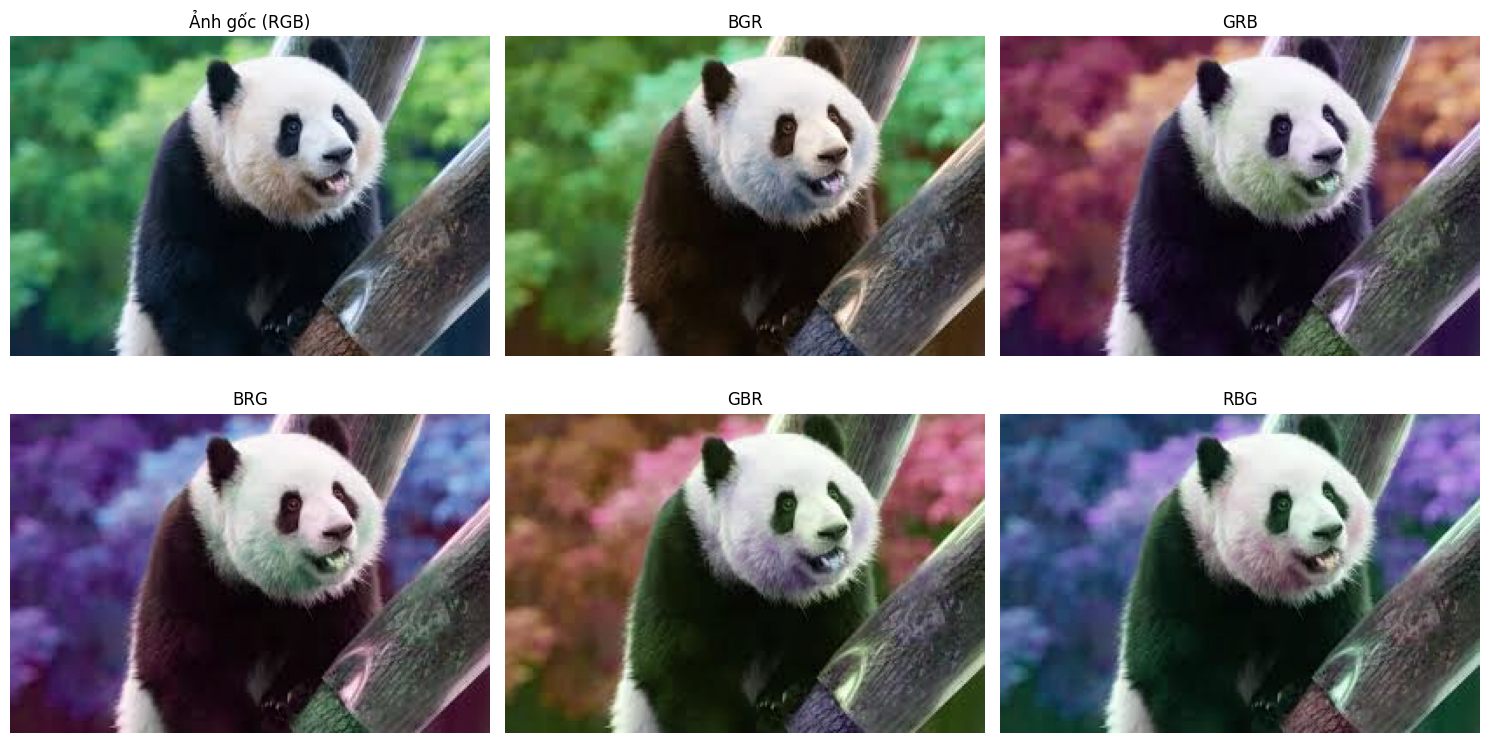

Hoàn tất hoán đổi và hiển thị ảnh.


In [ ]:
#bài 2
import imageio.v2 as iio
import numpy as np
import os
import matplotlib.pyplot as plt

# Đọc ảnh RGB
img = iio.imread('gau.jpg')

# Kiểm tra ảnh có 3 kênh màu
if img.shape[2] != 3:
    raise ValueError("Ảnh không phải RGB (3 kênh màu).")

# Các tổ hợp hoán đổi màu
swaps = {
    "BGR": [2, 1, 0],
    "GRB": [1, 0, 2],
    "BRG": [2, 0, 1],
    "GBR": [1, 2, 0],
    "RBG": [0, 2, 1]
}

# Thư mục lưu ảnh
output_dir = "color_swapped"
os.makedirs(output_dir, exist_ok=True)

# Hiển thị ảnh gốc
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Ảnh gốc (RGB)")
plt.axis('off')

# Lặp và lưu + hiển thị ảnh hoán đổi
for i, (name, order) in enumerate(swaps.items(), start=2):
    swapped = img[:, :, order]
    filename = os.path.join(output_dir, f"{name}.jpg")
    iio.imwrite(filename, swapped)
    print(f"Đã lưu: {filename}")

    # Hiển thị ảnh
    plt.subplot(2, 3, i)
    plt.imshow(swapped)
    plt.title(f"{name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Hoàn tất hoán đổi và hiển thị ảnh.")


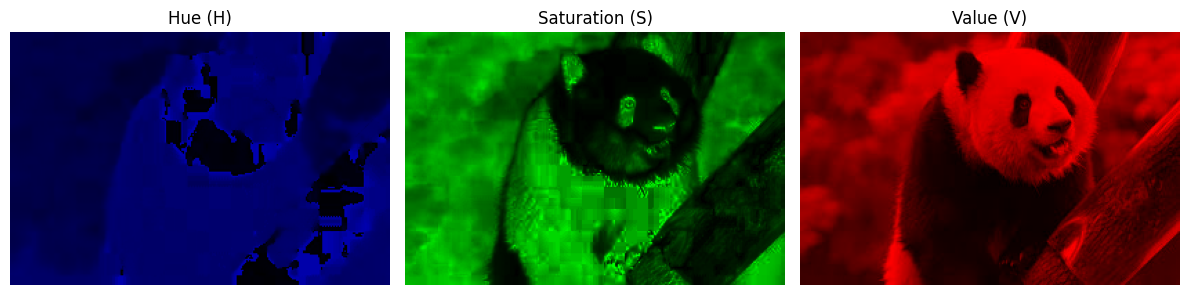

In [ ]:
#bài 3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc (dưới dạng BGR vì dùng OpenCV)
img_bgr = cv2.imread('gau.jpg')  # Thay bằng tên ảnh thật

# Kiểm tra nếu không tìm thấy ảnh
if img_bgr is None:
    raise FileNotFoundError("Không tìm thấy ảnh 'gau.jpg'.")

# Chuyển sang hệ HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Tách kênh
h, s, v = cv2.split(img_hsv)

# Tạo ảnh màu giả cho từng kênh
h_img = cv2.merge([h, np.zeros_like(h), np.zeros_like(h)])  # Hue → đỏ
s_img = cv2.merge([np.zeros_like(s), s, np.zeros_like(s)])  # Saturation → xanh lá
v_img = cv2.merge([np.zeros_like(v), np.zeros_like(v), v])  # Value → xanh dương

# Lưu ảnh
cv2.imwrite('hue_channel.jpg', h_img)
cv2.imwrite('saturation_channel.jpg', s_img)
cv2.imwrite('value_channel.jpg', v_img)

# Chuyển BGR sang RGB để hiển thị bằng matplotlib
h_img_rgb = cv2.cvtColor(h_img, cv2.COLOR_BGR2RGB)
s_img_rgb = cv2.cvtColor(s_img, cv2.COLOR_BGR2RGB)
v_img_rgb = cv2.cvtColor(v_img, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h_img_rgb)
plt.title('Hue (H)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s_img_rgb)
plt.title('Saturation (S)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v_img_rgb)
plt.title('Value (V)')
plt.axis('off')

plt.tight_layout()
plt.show()


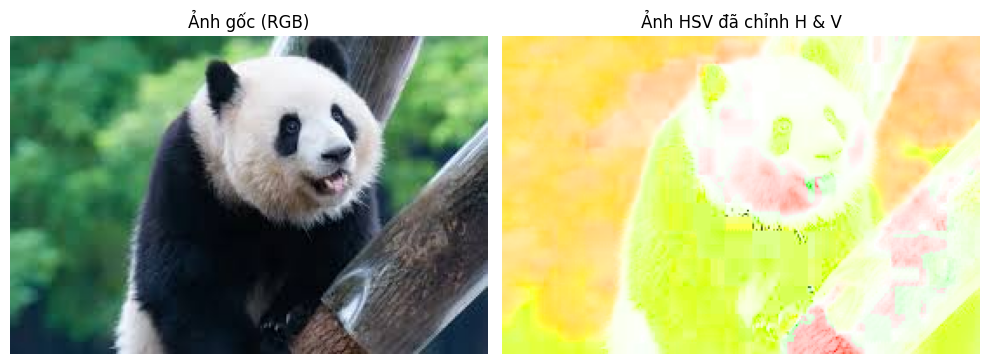

In [ ]:
#bài 4
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import colorsys

# Đọc ảnh RGB
img = iio.imread('gau.jpg')  # Thay bằng ảnh bạn có
if img.shape[2] != 3:
    raise ValueError("Ảnh không phải RGB.")

# Chuẩn hóa ảnh từ 0–255 sang 0–1
img_norm = img / 255.0

# Chuẩn bị ảnh đầu ra
hsv_modified = np.zeros_like(img_norm)

# Duyệt qua từng pixel, chuyển RGB → HSV, chỉnh H, V → chuyển ngược HSV → RGB
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img_norm[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)

        # Điều chỉnh kênh H và V
        h_new = (1/3) * h
        v_new = 34 * v
        v_new = min(v_new, 1.0)

        r_new, g_new, b_new = colorsys.hsv_to_rgb(h_new, s, v_new)
        hsv_modified[i, j] = [r_new, g_new, b_new]

# Chuyển về ảnh 0–255 và kiểu uint8
img_result = (hsv_modified * 255).astype(np.uint8)

# Lưu ảnh mới
iio.imwrite('hsv_modified.jpg', img_result)

# Hiển thị ảnh gốc và ảnh đã chuyển đổi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Ảnh gốc (RGB)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_result)
plt.title("Ảnh HSV đã chỉnh H & V")
plt.axis('off')

plt.tight_layout()
plt.show()


Đã xử lý và lưu: Exercise_mean_filtered\blue_image.jpg


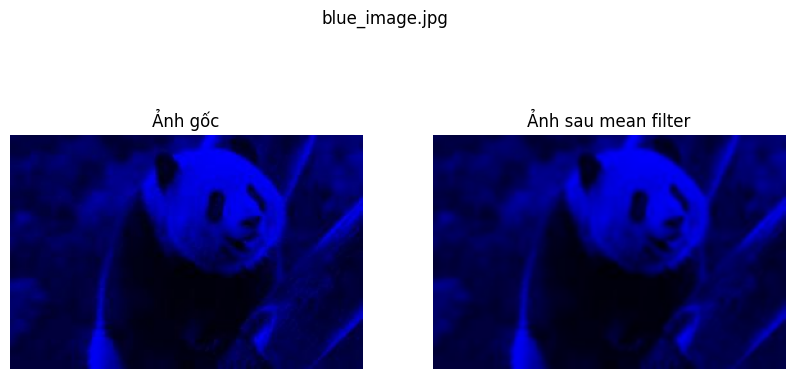

Đã xử lý và lưu: Exercise_mean_filtered\gau.jpg


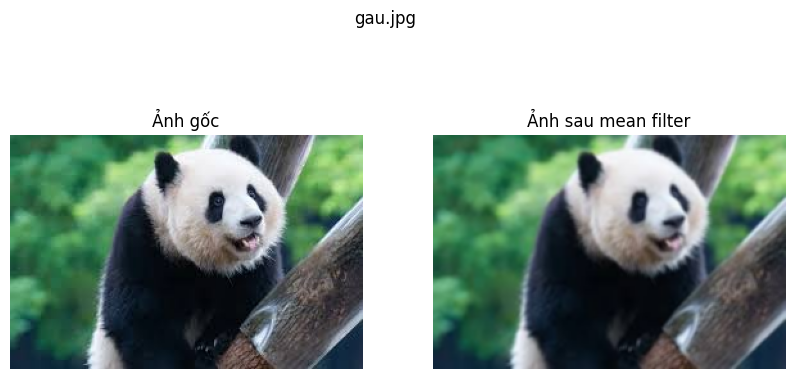

Đã xử lý và lưu: Exercise_mean_filtered\green_image.jpg


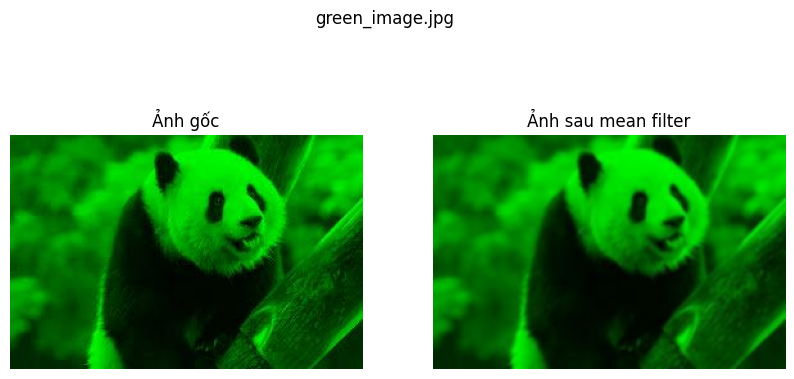

Đã xử lý và lưu: Exercise_mean_filtered\hsv_modified.jpg


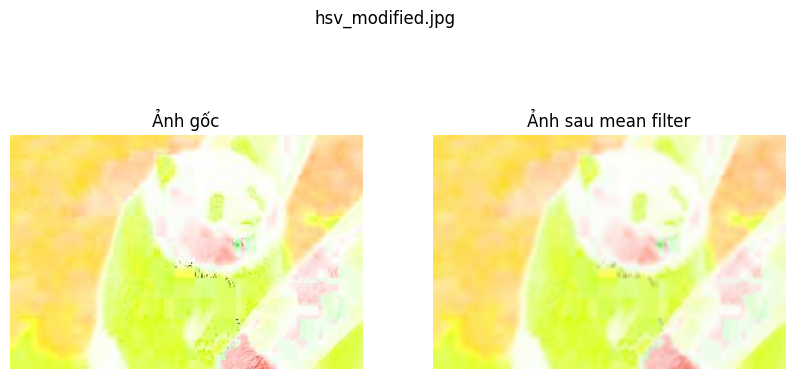

Đã xử lý và lưu: Exercise_mean_filtered\hue_channel.jpg


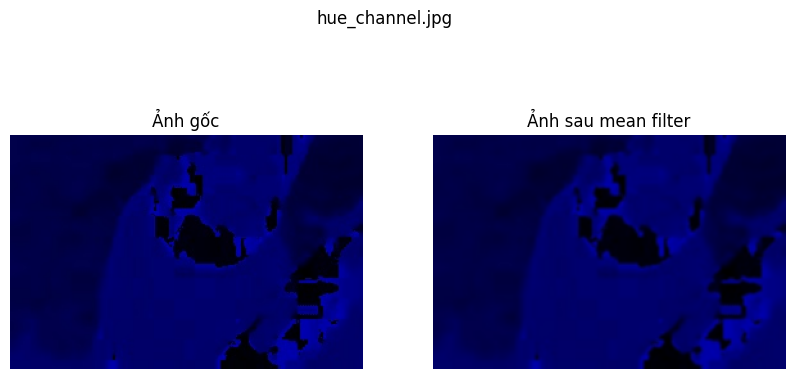

Đã xử lý và lưu: Exercise_mean_filtered\red_image.jpg


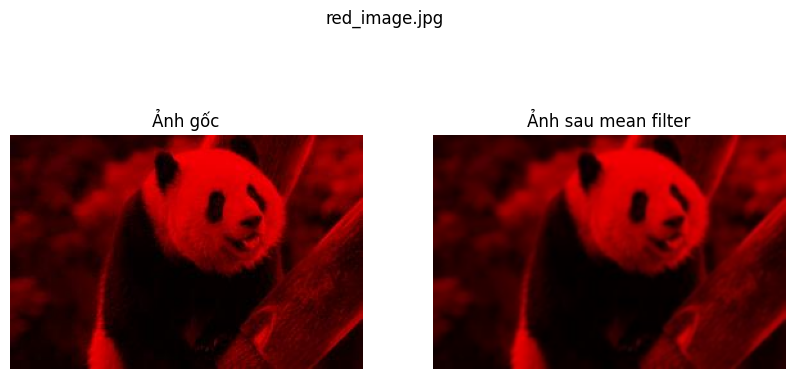

Đã xử lý và lưu: Exercise_mean_filtered\saturation_channel.jpg


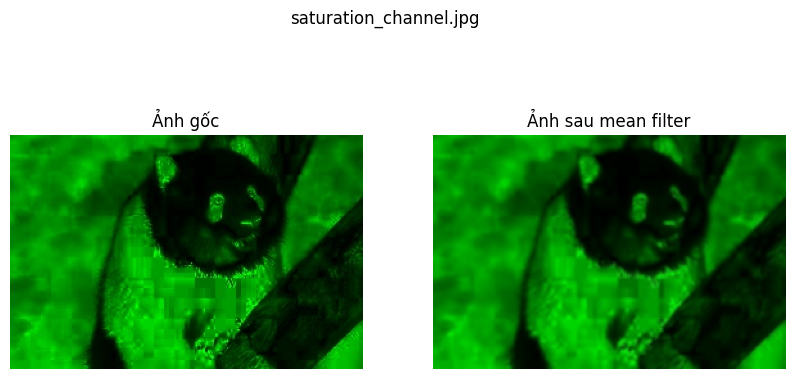

Đã xử lý và lưu: Exercise_mean_filtered\value_channel.jpg


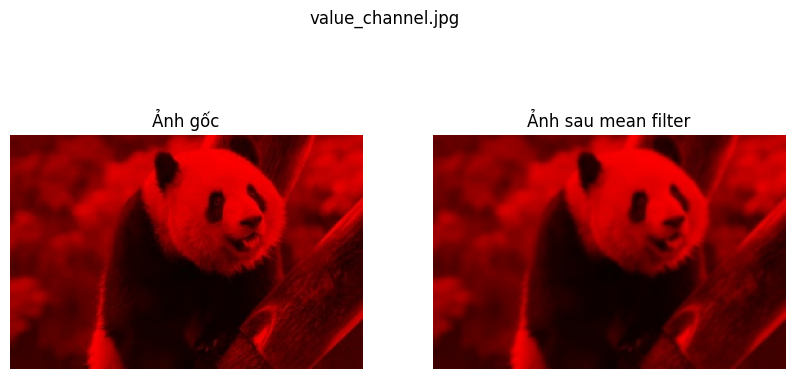

Hoàn tất xử lý và hiển thị ảnh.


In [ ]:
#bài 5
import os
import imageio.v2 as iio
import numpy as np
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt

input_dir = 'Exercise'
output_dir = 'Exercise_mean_filtered'
os.makedirs(output_dir, exist_ok=True)

filter_size = 3  # kích thước kernel mean filter

def mean_filter_color(img, size):
    filtered_img = np.zeros_like(img)
    for c in range(3):
        filtered_img[:, :, c] = uniform_filter(img[:, :, c], size=size)
    return filtered_img

# Lấy danh sách ảnh
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg'))]

for filename in image_files:
    path_in = os.path.join(input_dir, filename)
    img = iio.imread(path_in)
    if img.shape[-1] == 4:
        img = img[:, :, :3]
    filtered_img = mean_filter_color(img, filter_size).astype(np.uint8)
    path_out = os.path.join(output_dir, filename)
    iio.imwrite(path_out, filtered_img)
    print(f"Đã xử lý và lưu: {path_out}")

    # Hiển thị ảnh gốc và ảnh đã lọc
    plt.figure(figsize=(10, 5))
    plt.suptitle(filename)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Ảnh gốc')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img)
    plt.title('Ảnh sau mean filter')
    plt.axis('off')
    plt.show()

print("Hoàn tất xử lý và hiển thị ảnh.")
